# This notebook demonstrates how to propagate errors in Cpx-Liquid thermobarometry
- This builds on from the notebook showing how to consider error in a single phase (Liquid_Thermometry_error_prop.ipynb). We suggest you look at that first, as its simpler when you don't have to worry about two separate phases
- We use the experimental data of Feig et al. (2010) - DOI 10.1007/s00410-010-0493-3, and the author-stated 1 sigma errors

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None

In [2]:
# Importing data

out=pt.import_excel('Cpx_Liq_error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Importing errors (in publication, given as absolute errors for each oxide based on averaging of products within each experiment)

out_err=pt.import_excel_errors('Cpx_Liq_error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
myLiquids1_err=out_err['Liqs_Err']
myCpxs1_err=out_err['Cpxs_Err']
myinput_Out=out_err['my_input_Err']

# Example 1: Uncertainty in a single input parameter
- Here, we consider the effect of adding just 5% noise to measured Na2O contents of Cpx (a fairly typical uncertainty resulting from EPMA analyses)
- Because our liquids and cpx dataframes need to be the same size to feed into the calculate_Cpx_Liq functions, we also use the add_noise_sample_1phase to generate a dataframe of Liq compositions, however, we simply state noise_percent=0 so all the rows for each liquid are identical

In [10]:
# Making a liquid dataframe which is the right length, but has no noise
Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, noise_percent=0, duplicates=1000, err_dist="normal")

In [6]:
# Add 5% noise to Na2O in Cpx

Cpx_5Na2O=pt.add_noise_sample_1phase(phase_comp=myCpxs1, variable="Na2O", variable_err=5, 
                                              variable_err_type="Perc", duplicates=1000, 
                                             err_dist="normal")
Cpx_5Na2O.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,P_kbar,T_K,Sample_ID_Cpx_Num
0,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.294863,0.0,0.252186,0.0,1.0,1293.15,0.0
1,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.301980,0.0,0.252186,0.0,1.0,1293.15,0.0
2,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.311562,0.0,0.252186,0.0,1.0,1293.15,0.0
3,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.337247,0.0,0.252186,0.0,1.0,1293.15,0.0
4,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.336898,0.0,0.252186,0.0,1.0,1293.15,0.0


## Now we input these two new dataframes into the function for calculating P and T iteratively using two equations
- here, T=equation 33 from Putirka 2008, P=Equation 31 from Putirka 2008

In [11]:
Out_5_noise_cpx=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5Na2O, 
                                    equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", eq_tests=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


## Each histogram shows the pressure distribution from a single Cpx-Liquid pair resulting from adding 5% error.  

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


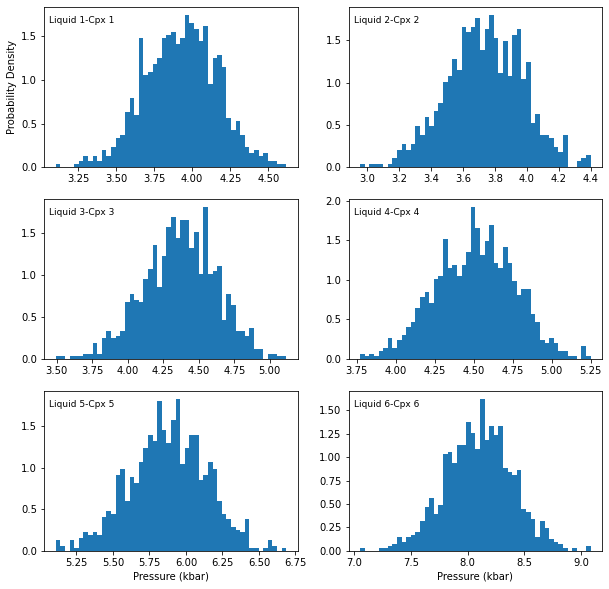

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 300

## We can plot the same diagram but for temperatures

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


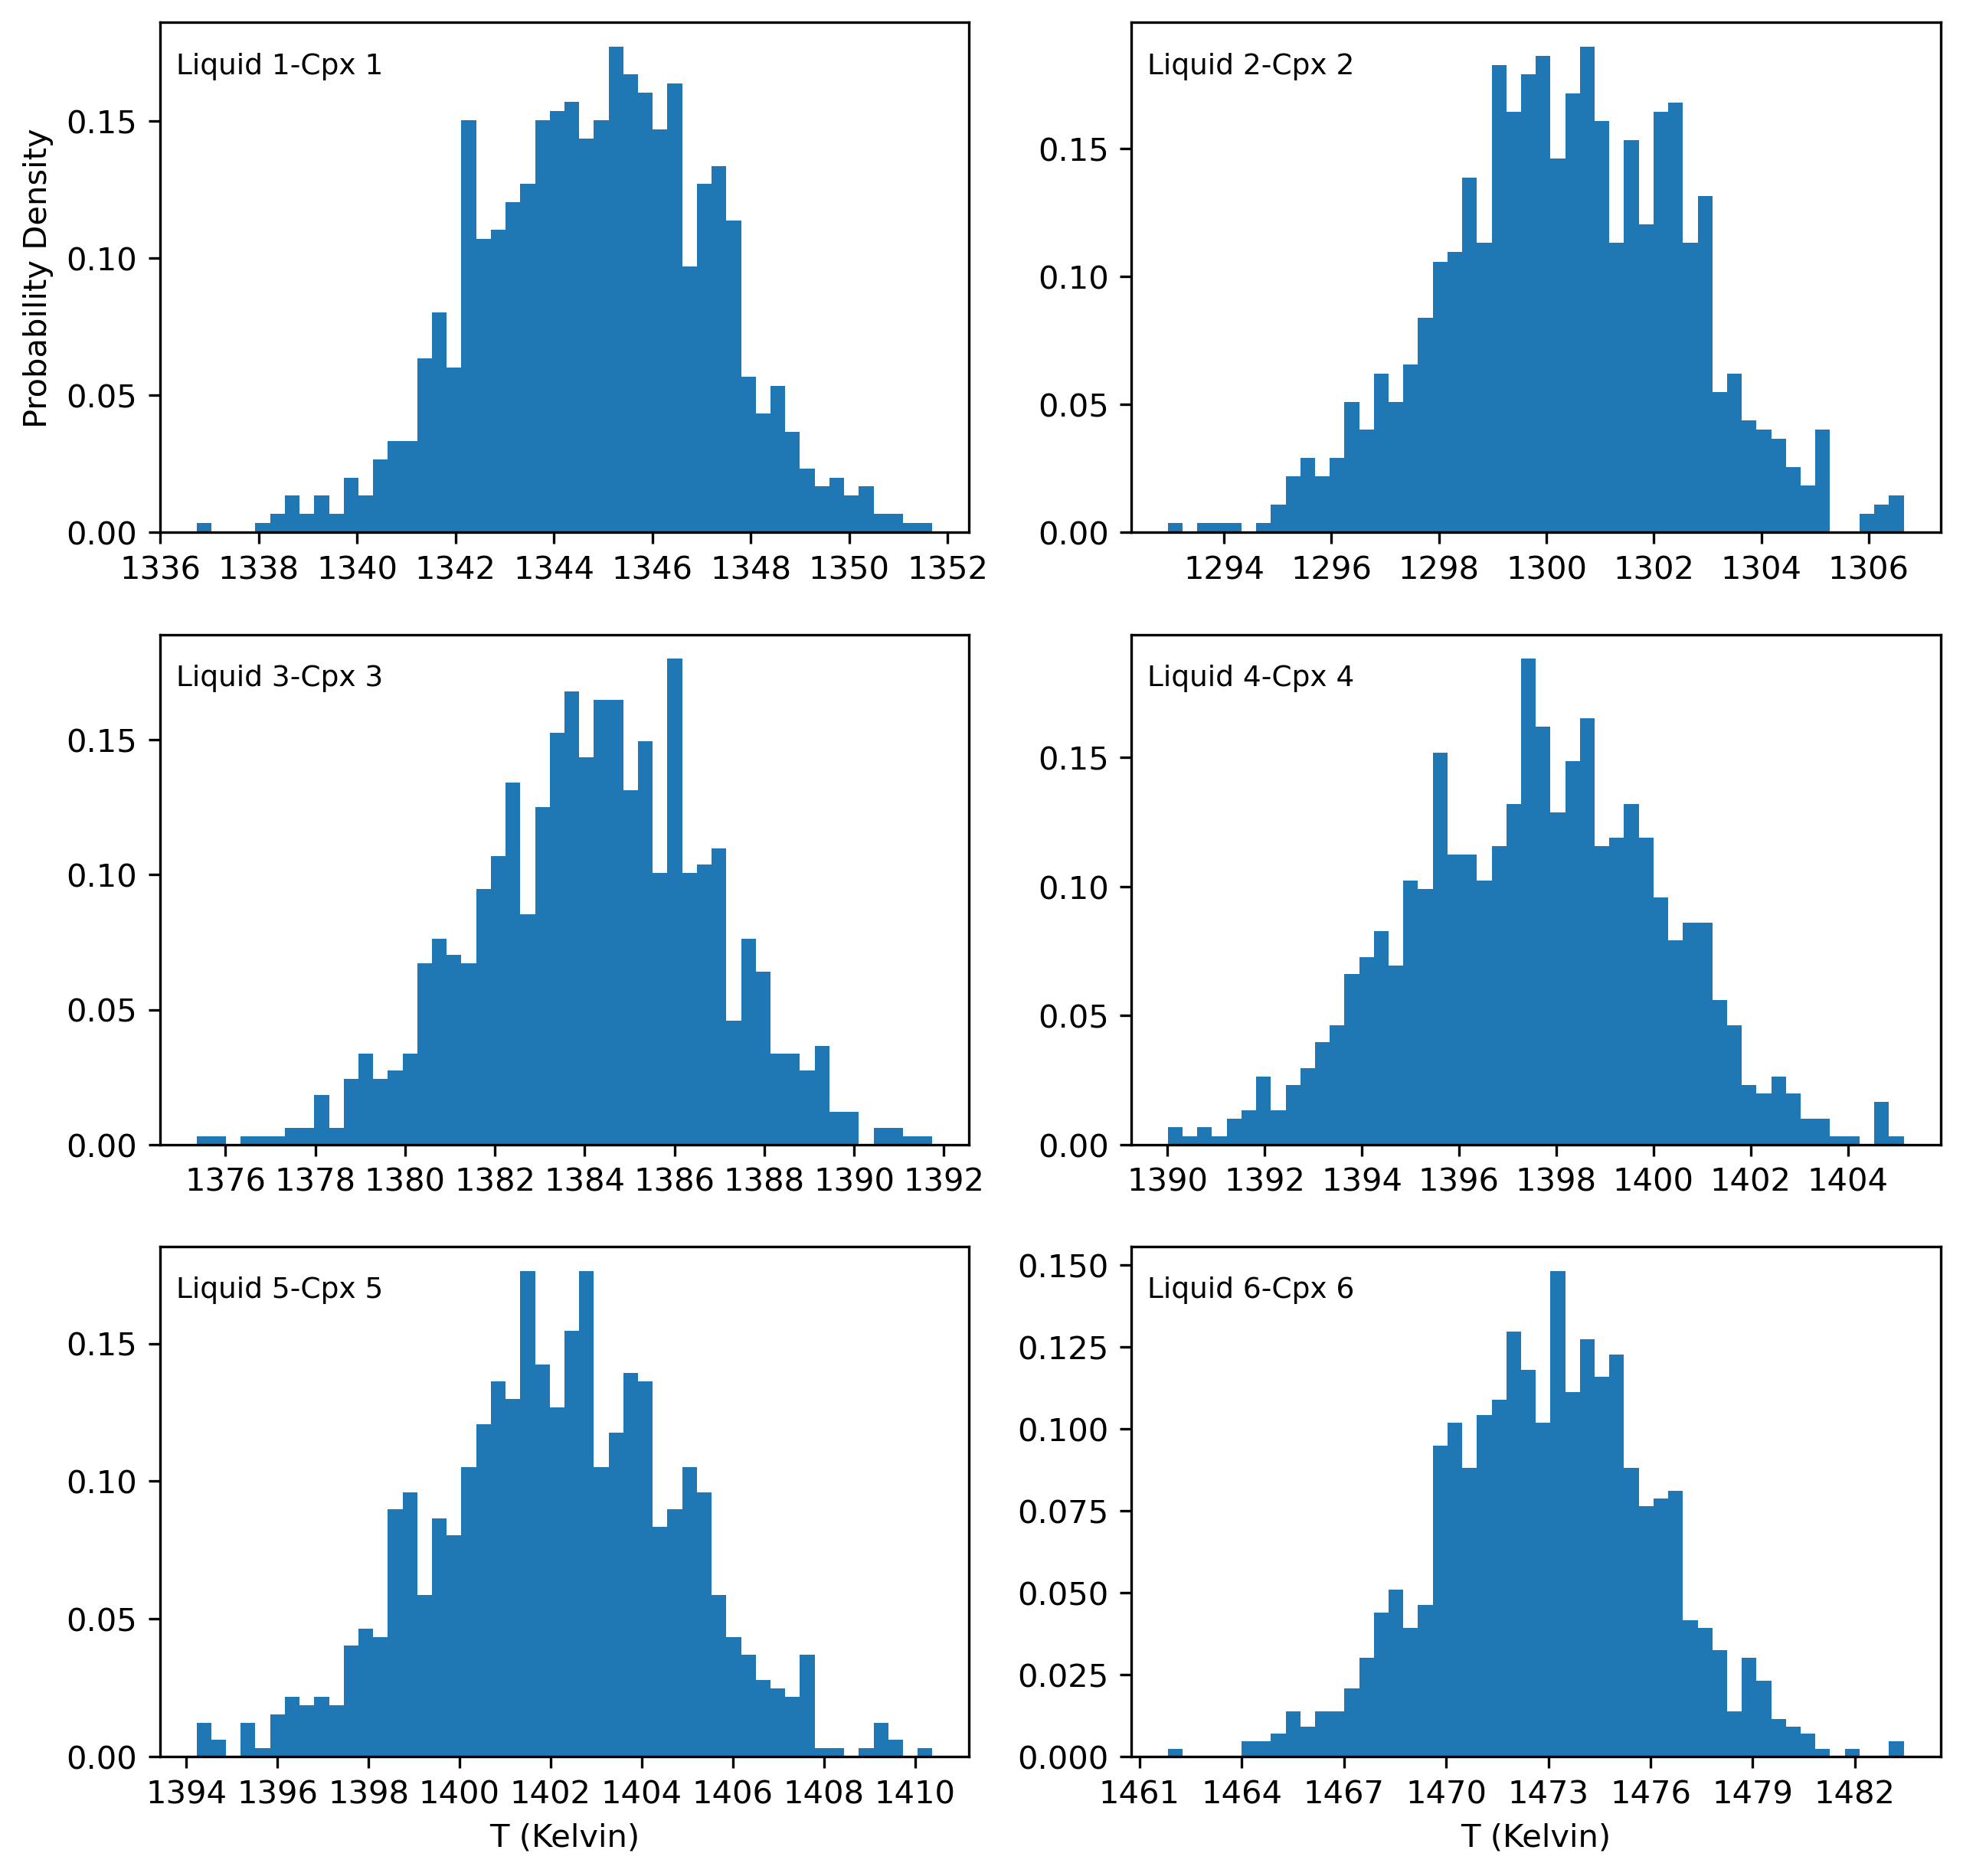

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax5.set_xlabel('T (Kelvin)')
ax6.set_xlabel('T (Kelvin)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 200
from pylab import MaxNLocator
ax1.xaxis.set_major_locator(MaxNLocator(integer = True))
ax2.xaxis.set_major_locator(MaxNLocator(integer = True))
ax3.xaxis.set_major_locator(MaxNLocator(integer = True))
ax4.xaxis.set_major_locator(MaxNLocator(integer = True))
ax5.xaxis.set_major_locator(MaxNLocator(integer = True))
ax6.xaxis.set_major_locator(MaxNLocator(integer = True))

### Again, we can use the function Av_Noise_Samples to calculate the mean, median, max, min and standard deviation 

In [16]:
Stats_T_K=pt.av_noise_samples_series(Out_5_noise_cpx['T_K_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_T_K

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.862685,1344.946206,2.336710,1351.692751,1336.734476
1,1.0,1300.367656,1300.396055,2.241795,1306.651992,1292.955342
2,2.0,1384.204689,1384.271773,2.579844,1391.743079,1375.355273
3,3.0,1397.565447,1397.644526,2.593141,1405.150650,1390.009700
4,4.0,1402.107598,1402.095836,2.688337,1410.384477,1394.227040
5,5.0,1472.989559,1473.110401,3.139741,1483.433171,1461.830611
6,6.0,1480.778745,1480.768566,3.109834,1491.886184,1471.342516


In [17]:
Stats_P_kbar=pt.av_noise_samples_series(Out_5_noise_cpx['P_kbar_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_P_kbar

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.926257,3.934732,0.236889,4.618644,3.102083
1,1.0,3.737807,3.740764,0.236126,4.400009,2.957326
2,2.0,4.369654,4.376300,0.255499,5.116255,3.493132
3,3.0,4.510040,4.517782,0.253288,5.250844,3.771858
4,4.0,5.878339,5.877184,0.262679,6.687197,5.108320
5,5.0,8.102229,8.113546,0.295035,9.084123,7.053927
6,6.0,6.217753,6.216931,0.283079,7.227667,5.357898


# Example 2 - published absolute 1 sigma values for all oxides
- Here, we use the 1 sigma values for each oxide in both the glass and cpx reported by Feig et al. 2010
- We make a noisy dataframe of the same length for liquids and cpxs, then combine them into the function for iterating P and T

In [22]:
Liquids_st_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

Cpxs_st_noise=pt.add_noise_sample_1phase(phase_comp=myCpxs1, phase_err=myCpxs1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [23]:
Out_st_noise=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_st_noise, cpx_comps=Cpxs_st_noise, 
                                    equationP="P_Put2008_eq31", 
                                             equationT="T_Put2008_eq33", eq_tests=True, iterations=50)


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
Stats_T_K=pt.av_noise_samples_series(Out_st_noise['T_K_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_T_K

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.414017,1344.962868,11.913064,1386.276976,1297.037127
1,1.0,1297.307342,1299.459563,18.427637,1340.835838,1087.757983
2,2.0,1379.849241,1381.340193,22.657048,1432.066375,1277.897165
3,3.0,1396.795775,1397.168909,10.695065,1424.279266,1351.346102
4,4.0,1402.594347,1402.712423,11.037068,1442.390613,1367.544785
5,5.0,1472.906673,1473.193230,7.007853,1495.443885,1447.895713
6,6.0,1480.341560,1480.489697,8.686724,1512.521297,1453.412743


In [25]:
Stats_P_kbar=pt.av_noise_samples_series(Out_st_noise['P_kbar_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_P_kbar

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.889951,3.940285,0.839779,6.077707,0.137175
1,1.0,3.447472,3.724100,1.756871,6.548999,-17.761073
2,2.0,3.942508,4.174495,2.110455,8.883845,-6.526874
3,3.0,4.446269,4.531242,0.905539,6.821825,0.058097
4,4.0,5.886842,5.922160,0.924334,8.584534,2.320500
5,5.0,8.104927,8.114702,0.478385,9.407493,6.546494
6,6.0,6.203717,6.225493,0.503343,7.446004,3.775613


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

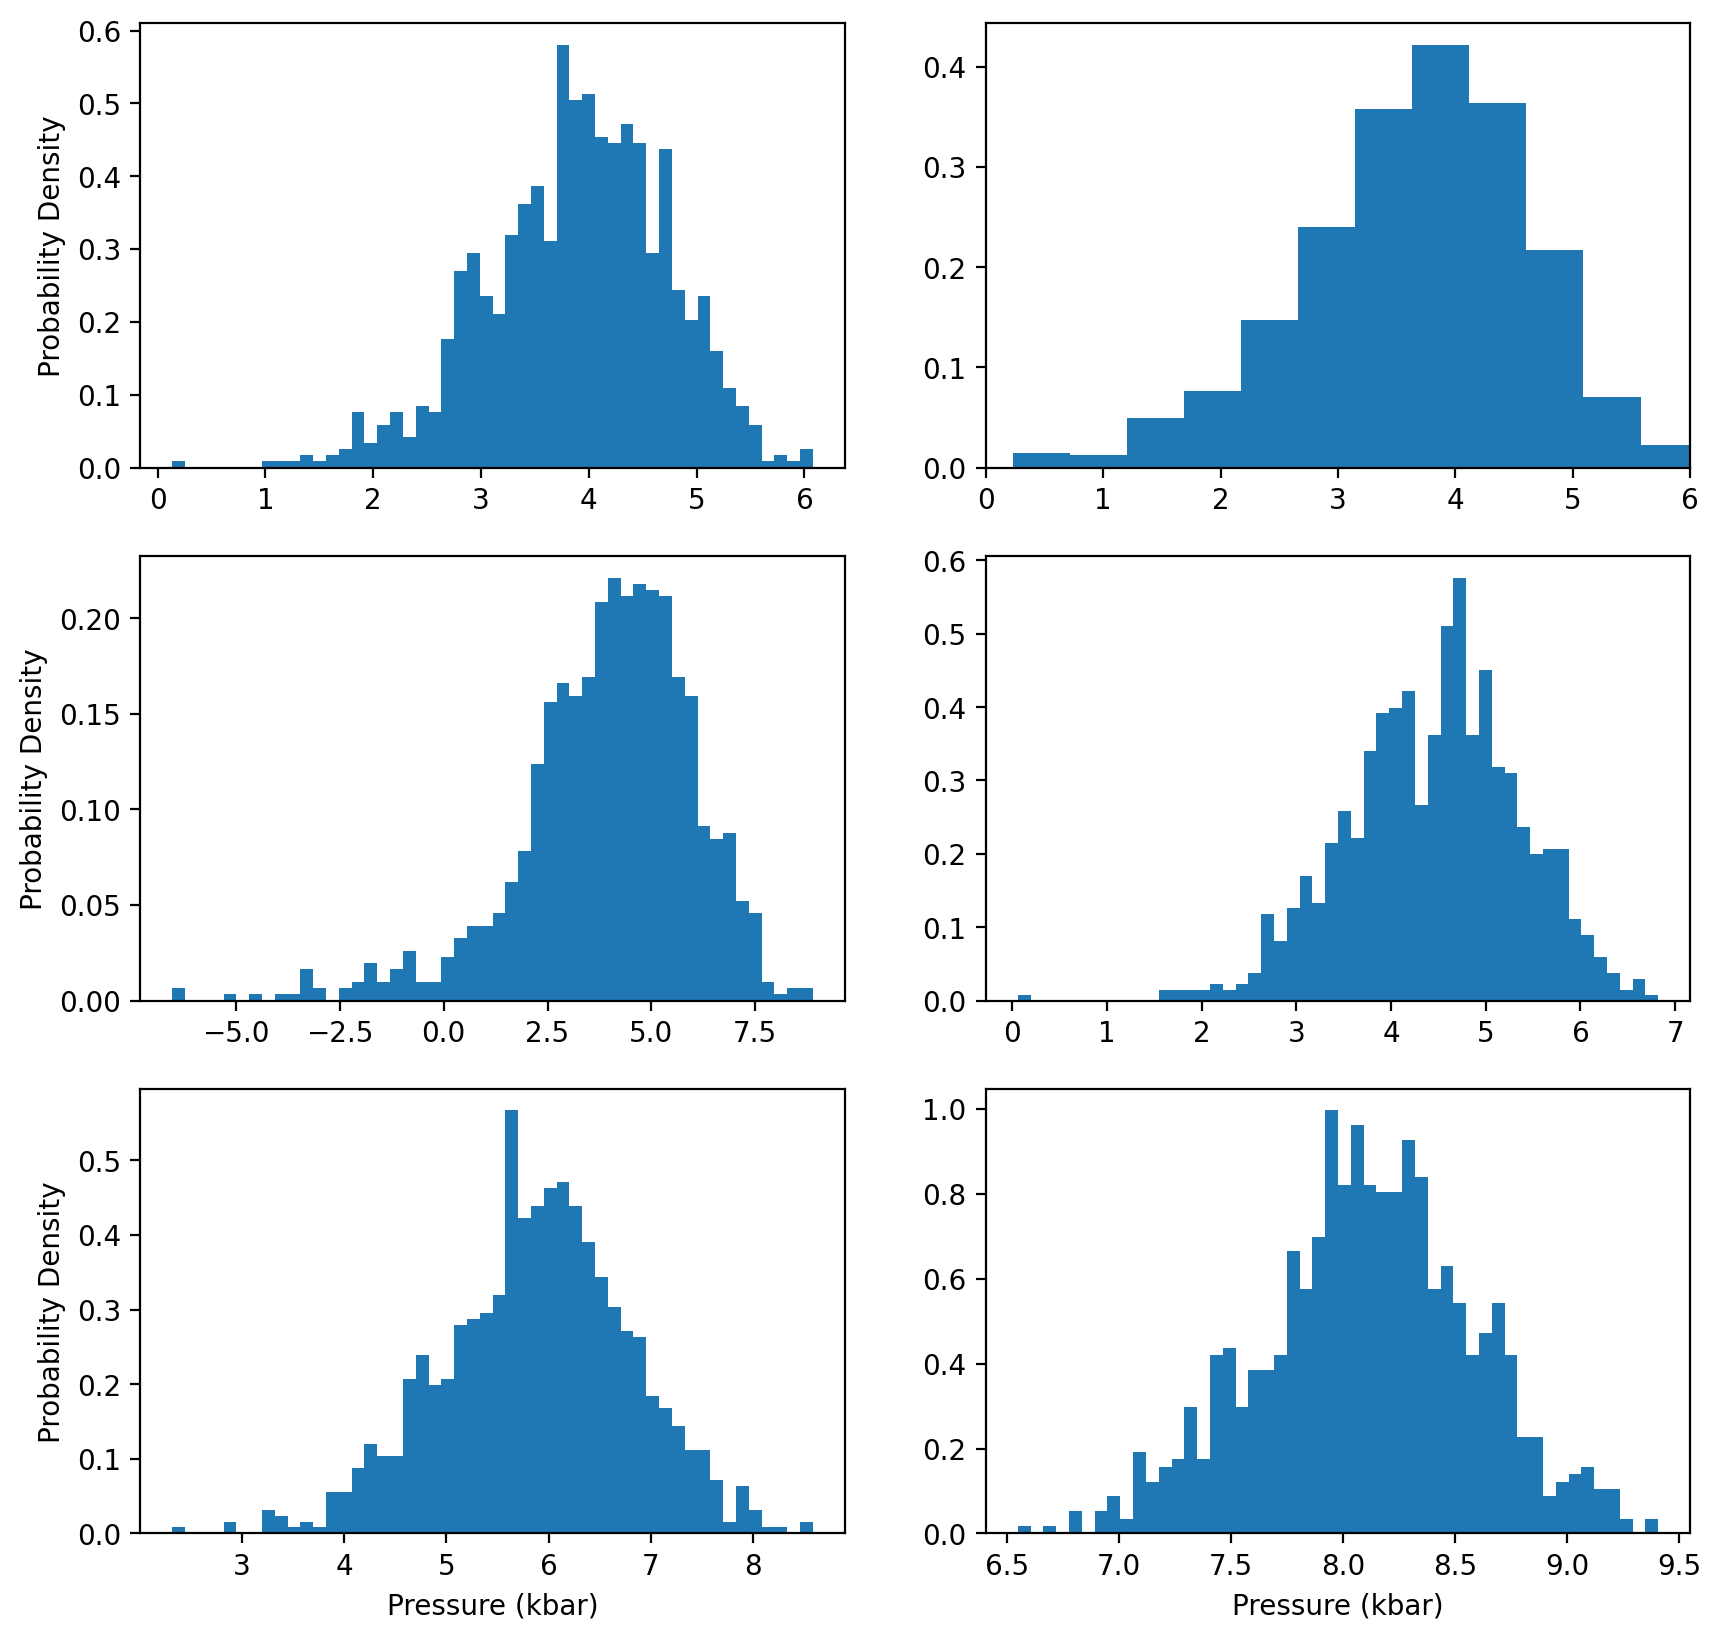

In [26]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax2.set_xlim([0, 6])
ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

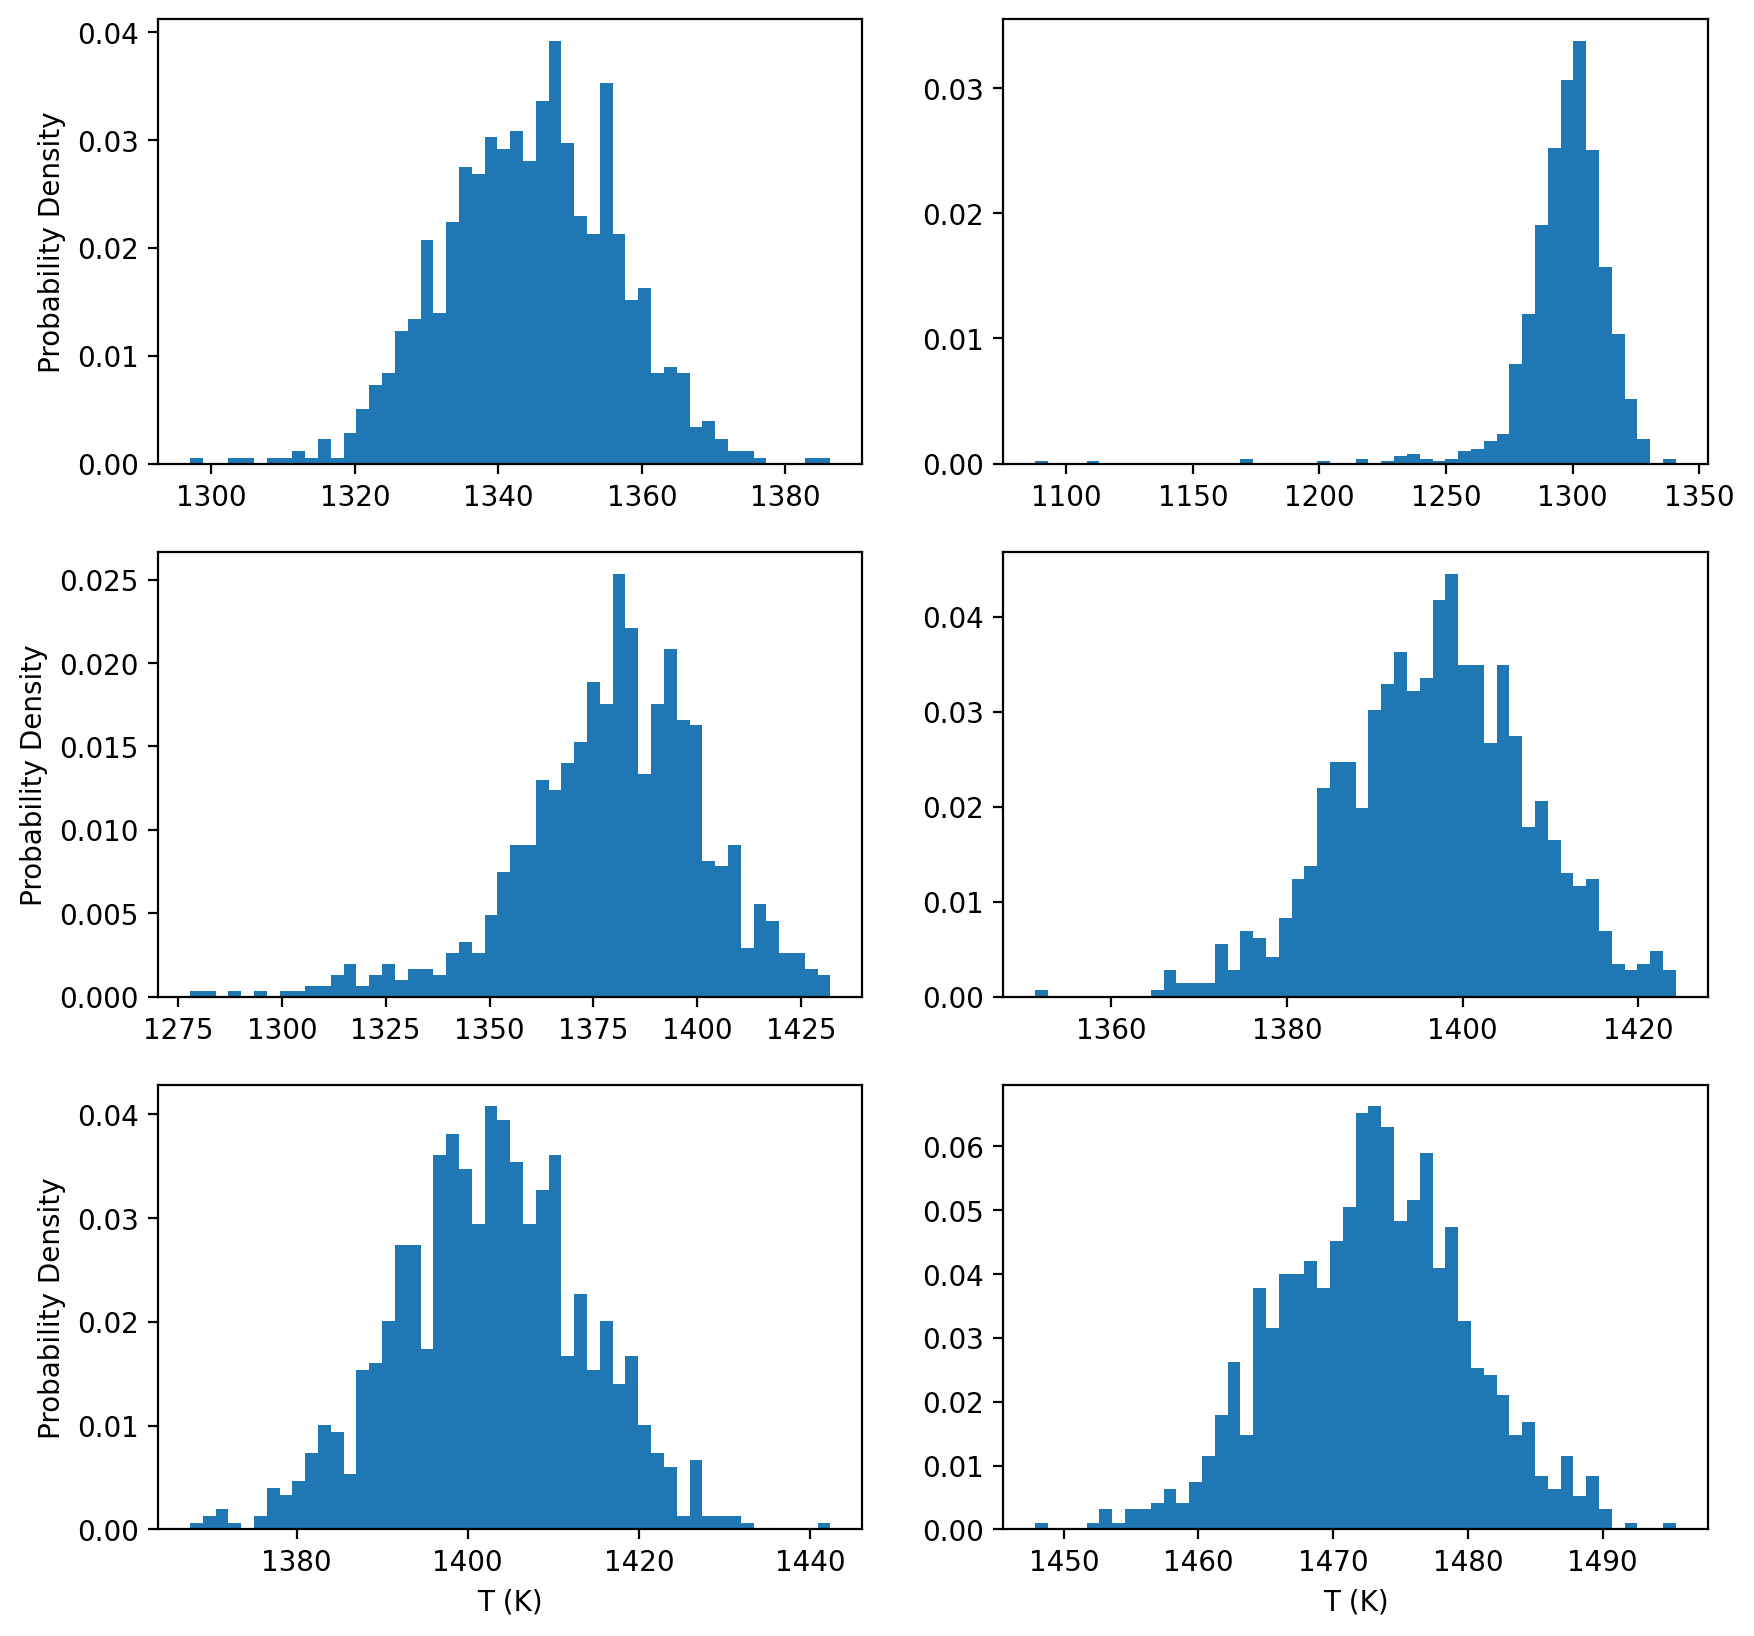

In [27]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

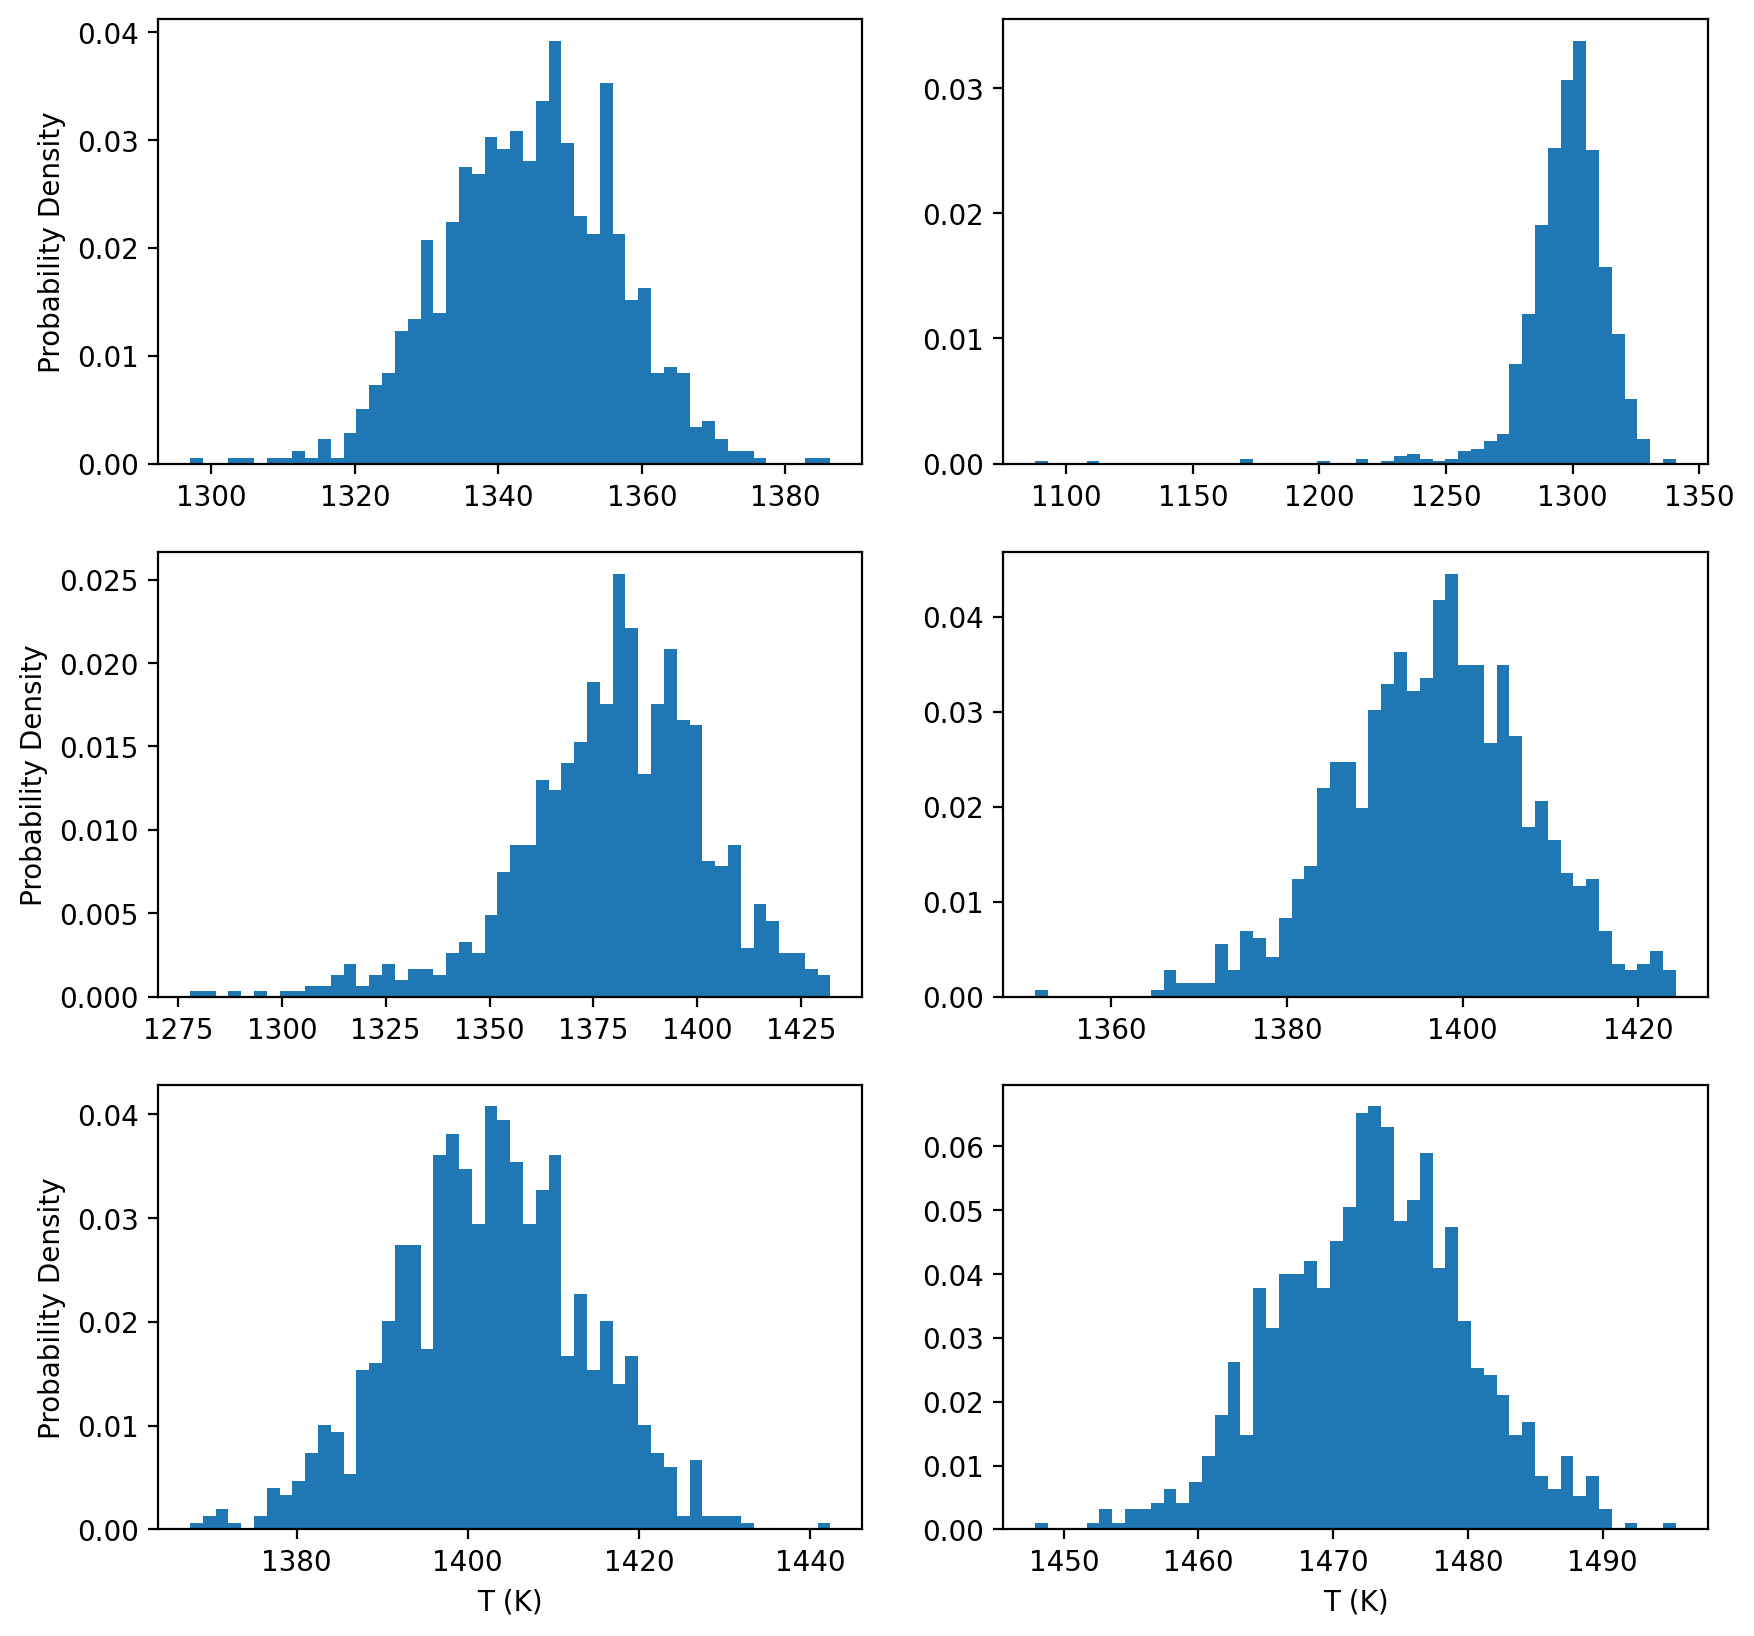

In [29]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')